TensorFlow的高阶API主要为tf.keras.models提供的模型的类接口。

使用Keras接口有以下3种方式构建模型：
- 使用Sequential按层顺序构建模型
- 使用函数式API构建任意结构模型
- 继承Model基类构建自定义模型。

此处分别演示使用Sequential按层顺序构建模型以及继承Model基类构建自定义模型。


In [1]:
import tensorflow as tf

#打印时间分割线
@tf.function
def printbar():
    today_ts = tf.timestamp()%(24*60*60)

    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8+timestring)

### 一、线性回归模型

此范例我们使用Sequential按层顺序构建模型，并使用内置model.fit方法训练模型【面向新手】。



#### 1.1 准备数据

In [3]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import tensorflow as tf
from tensorflow.keras import models,layers,losses,metrics,optimizers

#样本数量
n = 400

# 生成测试用数据集
X = tf.random.uniform([n,2],minval=-10,maxval=10) 
w0 = tf.constant([[2.0],[-3.0]])
b0 = tf.constant([[3.0]])
Y = X@w0 + b0 + tf.random.normal([n,1],mean = 0.0,stddev= 2.0)  # @表示矩阵乘法,增加正态扰动

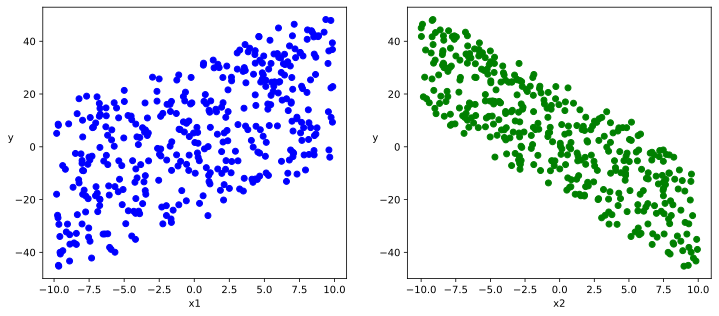

In [4]:
# 数据可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g")
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()

#### 1.2 定义模型

In [5]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(1, input_shape =(2,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### 1.3 训练模型

In [6]:
### 使用fit方法进行训练

model.compile(optimizer="adam",loss="mse",metrics=["mae"])
model.fit(X,Y,batch_size = 10,epochs = 200)  

tf.print("w = ",model.layers[0].kernel)
tf.print("b = ",model.layers[0].bias)

Train on 400 samples
Epoch 1/200
400/400 [==============================] - 0s 1ms/sample - loss: 268.1786 - mae: 13.5974
Epoch 2/200
400/400 [==============================] - 0s 98us/sample - loss: 258.5672 - mae: 13.3566
Epoch 3/200
400/400 [==============================] - 0s 103us/sample - loss: 249.0883 - mae: 13.1128
Epoch 4/200
400/400 [==============================] - 0s 119us/sample - loss: 239.9695 - mae: 12.8747
Epoch 5/200
400/400 [==============================] - 0s 100us/sample - loss: 230.9045 - mae: 12.6388
Epoch 6/200
400/400 [==============================] - 0s 107us/sample - loss: 222.3369 - mae: 12.4042
Epoch 7/200
400/400 [==============================] - 0s 104us/sample - loss: 213.8334 - mae: 12.1700
Epoch 8/200
400/400 [==============================] - 0s 107us/sample - loss: 205.7351 - mae: 11.9383
Epoch 9/200
400/400 [==============================] - 0s 102us/sample - loss: 197.7701 - mae: 11.7132
Epoch 10/200
400/400 [==============================] -

400/400 [==============================] - 0s 92us/sample - loss: 7.2271 - mae: 2.2017
Epoch 82/200
400/400 [==============================] - 0s 100us/sample - loss: 6.9902 - mae: 2.1627
Epoch 83/200
400/400 [==============================] - 0s 95us/sample - loss: 6.7699 - mae: 2.1254
Epoch 84/200
400/400 [==============================] - 0s 94us/sample - loss: 6.5664 - mae: 2.0899
Epoch 85/200
400/400 [==============================] - 0s 97us/sample - loss: 6.3746 - mae: 2.0571
Epoch 86/200
400/400 [==============================] - 0s 97us/sample - loss: 6.1986 - mae: 2.0245
Epoch 87/200
400/400 [==============================] - 0s 99us/sample - loss: 6.0377 - mae: 1.9947
Epoch 88/200
400/400 [==============================] - 0s 98us/sample - loss: 5.8806 - mae: 1.9665
Epoch 89/200
400/400 [==============================] - 0s 98us/sample - loss: 5.7411 - mae: 1.9394
Epoch 90/200
400/400 [==============================] - 0s 98us/sample - loss: 5.6126 - mae: 1.9149
Epoch 91/200

400/400 [==============================] - 0s 88us/sample - loss: 3.9023 - mae: 1.5611
Epoch 163/200
400/400 [==============================] - 0s 90us/sample - loss: 3.9012 - mae: 1.5609
Epoch 164/200
400/400 [==============================] - 0s 91us/sample - loss: 3.9017 - mae: 1.5612
Epoch 165/200
400/400 [==============================] - 0s 88us/sample - loss: 3.8997 - mae: 1.5607
Epoch 166/200
400/400 [==============================] - 0s 87us/sample - loss: 3.9020 - mae: 1.5619
Epoch 167/200
400/400 [==============================] - 0s 91us/sample - loss: 3.9022 - mae: 1.5619
Epoch 168/200
400/400 [==============================] - 0s 88us/sample - loss: 3.8997 - mae: 1.5611
Epoch 169/200
400/400 [==============================] - 0s 88us/sample - loss: 3.9006 - mae: 1.5610
Epoch 170/200
400/400 [==============================] - 0s 87us/sample - loss: 3.8970 - mae: 1.5608
Epoch 171/200
400/400 [==============================] - 0s 88us/sample - loss: 3.8983 - mae: 1.5614
Epoc

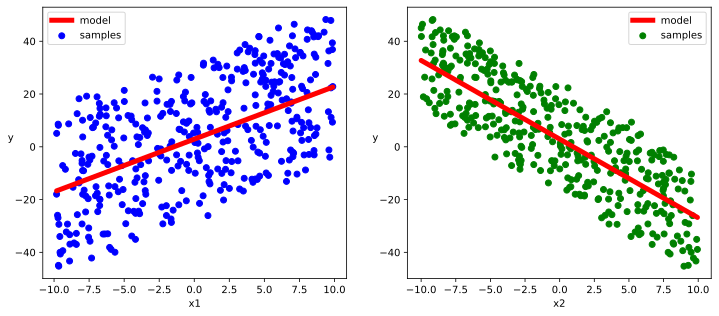

In [7]:
# 结果可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

w,b = model.variables

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()

### 二、DNN二分类模型

此范例我们使用继承Model基类构建自定义模型，并构建自定义训练循环【面向专家】



#### 2.1 准备数据

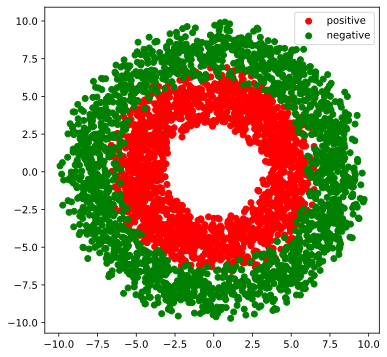

In [9]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,losses,metrics,optimizers
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#正负样本数量
n_positive,n_negative = 2000,2000
n = n_positive+n_negative

#生成正样本, 小圆环分布
r_p = 5.0 + tf.random.truncated_normal([n_positive,1],0.0,1.0)
theta_p = tf.random.uniform([n_positive,1],0.0,2*np.pi) 
Xp = tf.concat([r_p*tf.cos(theta_p),r_p*tf.sin(theta_p)],axis = 1)
Yp = tf.ones_like(r_p)

#生成负样本, 大圆环分布
r_n = 8.0 + tf.random.truncated_normal([n_negative,1],0.0,1.0)
theta_n = tf.random.uniform([n_negative,1],0.0,2*np.pi) 
Xn = tf.concat([r_n*tf.cos(theta_n),r_n*tf.sin(theta_n)],axis = 1)
Yn = tf.zeros_like(r_n)

#汇总样本
X = tf.concat([Xp,Xn],axis = 0)
Y = tf.concat([Yp,Yn],axis = 0)

#样本洗牌
data = tf.concat([X,Y],axis = 1)
data = tf.random.shuffle(data)
X = data[:,:2]
Y = data[:,2:]


#可视化
plt.figure(figsize = (6,6))
plt.scatter(Xp[:,0].numpy(),Xp[:,1].numpy(),c = "r")
plt.scatter(Xn[:,0].numpy(),Xn[:,1].numpy(),c = "g")
plt.legend(["positive","negative"])

In [10]:
ds_train = tf.data.Dataset.from_tensor_slices((X[0:n*3//4,:],Y[0:n*3//4,:])) \
     .shuffle(buffer_size = 1000).batch(20) \
     .prefetch(tf.data.experimental.AUTOTUNE) \
     .cache()

ds_valid = tf.data.Dataset.from_tensor_slices((X[n*3//4:,:],Y[n*3//4:,:])) \
     .batch(20) \
     .prefetch(tf.data.experimental.AUTOTUNE) \
     .cache()

#### 2.2 定义模型

In [11]:
tf.keras.backend.clear_session()

class DNNModel(models.Model):
    def __init__(self):
        super(DNNModel, self).__init__()
        
    def build(self,input_shape):
        self.dense1 = layers.Dense(4,activation = "relu",name = "dense1") 
        self.dense2 = layers.Dense(8,activation = "relu",name = "dense2")
        self.dense3 = layers.Dense(1,activation = "sigmoid",name = "dense3")
        super(DNNModel,self).build(input_shape)
 
    # 正向传播
    @tf.function(input_signature=[tf.TensorSpec(shape = [None,2], dtype = tf.float32)])  
    def call(self,x):
        x = self.dense1(x)
        x = self.dense2(x)
        y = self.dense3(x)
        return y

model = DNNModel()
model.build(input_shape =(None,2))

model.summary()

Model: "dnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               multiple                  12        
_________________________________________________________________
dense2 (Dense)               multiple                  40        
_________________________________________________________________
dense3 (Dense)               multiple                  9         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


#### 2.3 训练模型

In [12]:
### 自定义训练循环
optimizer = optimizers.Adam(learning_rate=0.01)
loss_func = tf.keras.losses.BinaryCrossentropy()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_metric = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

valid_loss = tf.keras.metrics.Mean(name='valid_loss')
valid_metric = tf.keras.metrics.BinaryAccuracy(name='valid_accuracy')


@tf.function
def train_step(model, features, labels):
    with tf.GradientTape() as tape:
        predictions = model(features)
        loss = loss_func(labels, predictions)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_loss.update_state(loss)
    train_metric.update_state(labels, predictions)

@tf.function
def valid_step(model, features, labels):
    predictions = model(features)
    batch_loss = loss_func(labels, predictions)
    valid_loss.update_state(batch_loss)
    valid_metric.update_state(labels, predictions)
    

def train_model(model,ds_train,ds_valid,epochs):
    for epoch in tf.range(1,epochs+1):
        for features, labels in ds_train:
            train_step(model,features,labels)

        for features, labels in ds_valid:
            valid_step(model,features,labels)

        logs = 'Epoch={},Loss:{},Accuracy:{},Valid Loss:{},Valid Accuracy:{}'
        
        if  epoch%100 ==0:
            printbar()
            tf.print(tf.strings.format(logs,
            (epoch,train_loss.result(),train_metric.result(),valid_loss.result(),valid_metric.result())))
        
        train_loss.reset_states()
        valid_loss.reset_states()
        train_metric.reset_states()
        valid_metric.reset_states()

train_model(model,ds_train,ds_valid,1000)

================================================================================11:34:44
Epoch=100,Loss:0.117216177,Accuracy:0.948,Valid Loss:0.15551132,Valid Accuracy:0.928
================================================================================11:34:55
Epoch=200,Loss:0.110846408,Accuracy:0.951333344,Valid Loss:0.152173713,Valid Accuracy:0.933
================================================================================11:35:06
Epoch=300,Loss:0.109165892,Accuracy:0.953666687,Valid Loss:0.155748233,Valid Accuracy:0.929
================================================================================11:35:16
Epoch=400,Loss:0.101296499,Accuracy:0.954666674,Valid Loss:0.13644819,Valid Accuracy:0.936
================================================================================11:35:27
Epoch=500,Loss:0.100990191,Accuracy:0.95266664,Valid Loss:0.135129049,Valid Accuracy:0.937
================================================================================11:35:38
Epoch=600,Loss:

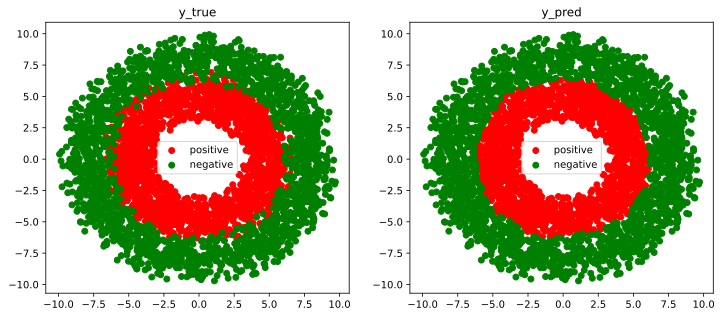

In [13]:
# 结果可视化
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,5))
ax1.scatter(Xp[:,0].numpy(),Xp[:,1].numpy(),c = "r")
ax1.scatter(Xn[:,0].numpy(),Xn[:,1].numpy(),c = "g")
ax1.legend(["positive","negative"]);
ax1.set_title("y_true");

Xp_pred = tf.boolean_mask(X,tf.squeeze(model(X)>=0.5),axis = 0)
Xn_pred = tf.boolean_mask(X,tf.squeeze(model(X)<0.5),axis = 0)

ax2.scatter(Xp_pred[:,0].numpy(),Xp_pred[:,1].numpy(),c = "r")
ax2.scatter(Xn_pred[:,0].numpy(),Xn_pred[:,1].numpy(),c = "g")
ax2.legend(["positive","negative"]);
ax2.set_title("y_pred");